In [1]:
import pandas as pd
from utilities import clean_data, missing_df, ranking_followers
import numpy as np
import seaborn as sns
import math
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Base style

In [2]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [14]:
brands_by_cgroup = {} # dict: list of brands contained in each compset_group
for group in compset_groups:
    brands_by_cgroup[group] = df_brands[df_brands['compset_group'] == group][
        'business_entity_doing_business_as_name'].tolist()

In [15]:
cgroup_ranking = {cgroup: df[df['business_entity_doing_business_as_name'].isin(brands_by_cgroup[cgroup])].dropna(subset=['followers']).copy() for cgroup in compset_groups}

In [16]:
for cgroup in compset_groups:
    cgroup_ranking[cgroup]['FRanking']=np.nan
    for date, data in cgroup_ranking[cgroup].groupby('period_end_date'):
        cgroup_ranking[cgroup].loc[data.index, 'FRanking'] = data['followers'].rank(ascending=False, method='dense').astype(int)

In [17]:
for cgroup in compset_groups:
    grouped = cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name')
    cgroup_ranking[cgroup]['diff_FRanking'] = grouped['FRanking'].diff()

In [22]:
for cgroup in compset_groups:
    cgroup_ranking[cgroup]['diff_FRanking_blur'] = cgroup_ranking[cgroup]['diff_FRanking'].rolling(window=5, center=True).mean()

In [26]:
for cgroup in compset_groups:
    cgroup_ranking[cgroup]['diff_FRanking_blur_norm'] = cgroup_ranking[cgroup].apply(lambda row: row['diff_FRanking_blur']/len(brands_by_cgroup[cgroup]), axis=1)

In [27]:
cgroup_ranking['Restaurants']

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes,FRanking,diff_FRanking,diff_FRanking_blur,diff_FRanking_blur_norm
14960,2017-01-21,Applebee's,482512.0,178.0,16.0,1430.0,40860.0,10.0,NaN,NaN,NaN
14961,2017-01-28,Applebee's,484220.0,177.0,16.0,1414.0,42502.0,10.0,0.0,NaN,NaN
14962,2017-02-04,Applebee's,485765.0,164.0,20.0,1309.0,44791.0,10.0,0.0,NaN,NaN
14963,2017-02-11,Applebee's,487701.0,162.0,16.0,1296.0,38335.0,10.0,0.0,0.0,0.000000
14964,2017-02-18,Applebee's,489553.0,152.0,12.0,837.0,29388.0,10.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
289423,2023-08-19,Wingstop,792270.0,69.0,47.0,5248.0,270479.0,22.0,-1.0,-0.2,-0.005128
289424,2023-08-26,Wingstop,797691.0,70.0,45.0,6178.0,281429.0,22.0,0.0,-0.2,-0.005128
289425,2023-09-02,Wingstop,802862.0,74.0,41.0,4896.0,89502.0,22.0,0.0,-0.2,-0.005128
289426,2023-09-09,Wingstop,805902.0,75.0,40.0,4702.0,98168.0,22.0,0.0,NaN,NaN


In [25]:
compset_groups

array(['Luxury & Premium & Mainstream', 'Restaurants', 'Beverages',
       'Apparel Retail', 'Food Products', 'Sporting Goods',
       'Sportswear & Athleisure', 'Beauty & Boutique',
       'Building Products', 'Petcare', 'Toys & Collectibles', 'Mattress',
       'Fitness & Exercise', 'Food Retail', 'Discount Retailers ',
       'Outdoor Gear', 'Dermatology and Orthodontics', 'Entertainment',
       'Home Appliances'], dtype=object)

In [3]:
cgroup_ranking, brands_by_cgroup = ranking_followers(df, df_brands, compset_groups)

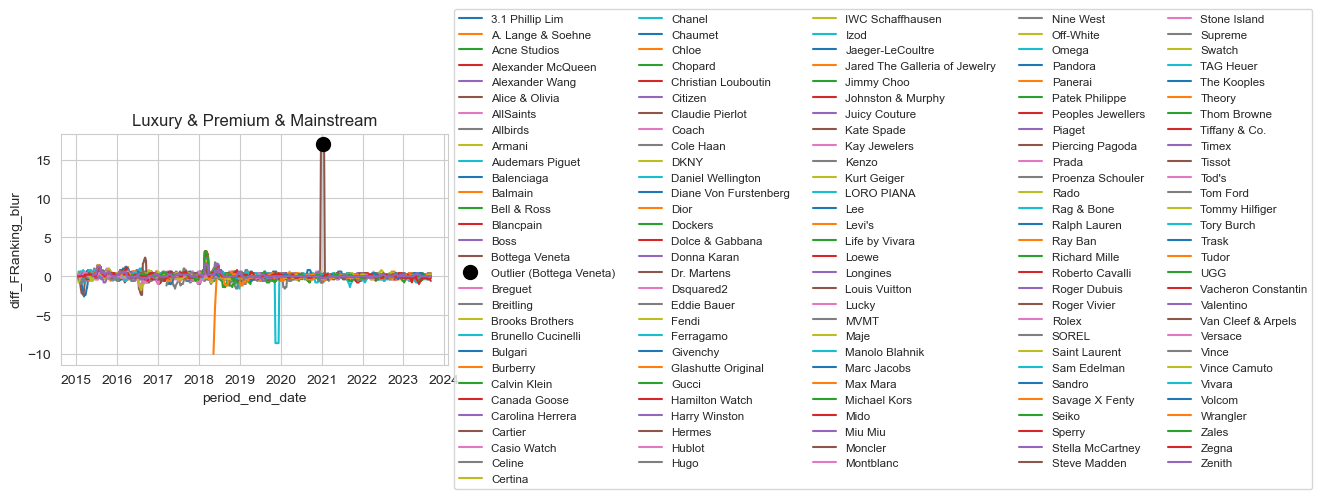

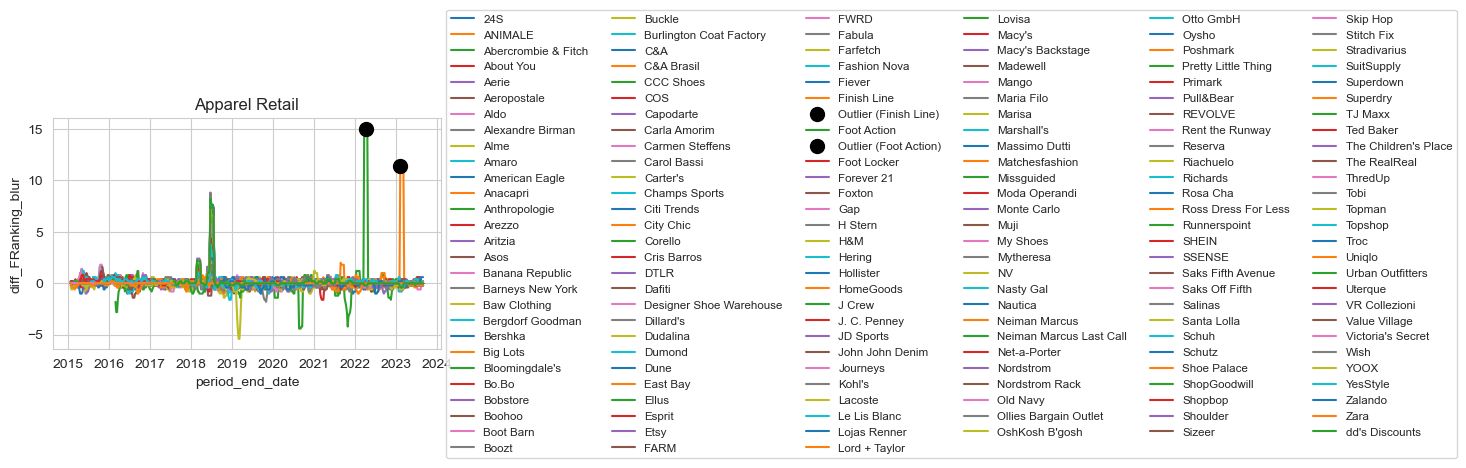

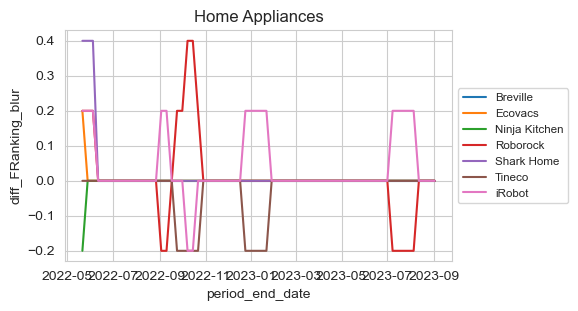

In [4]:
relevant_cgroups=['Luxury & Premium & Mainstream', 'Apparel Retail','Home Appliances']
#for cgroup in ['Restaurants']:
#for cgroup in compset_groups:
for cgroup in relevant_cgroups:
    #dff=cgroup_ranking[cgroup][cgroup_ranking[cgroup]['business_entity_doing_business_as_name'].isin(['Main Event', 'Wingstop'])]
    dff=cgroup_ranking[cgroup]
    # plt.figure(figsize=(5,3))
    # for brand, data in dff.groupby('business_entity_doing_business_as_name'):
    #     plt.semilogy(data['period_end_date'], data['followers'], label=brand)
    # plt.xlabel('period_end_date')
    # plt.ylabel('followers')
    # plt.title(cgroup)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    # plt.grid(True)
    # plt.show()
    # 
    # plt.figure(figsize=(5,3))
    # for brand, data in dff.groupby('business_entity_doing_business_as_name'):
    #     plt.plot(data['period_end_date'], data['FRanking'], label=brand)
    # plt.xlabel('period_end_date')
    # plt.ylabel('FRanking')
    # plt.title(cgroup)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    # plt.grid(True)
    # plt.show()
    
    # plt.figure(figsize=(5,3))
    # for brand, data in dff.groupby('business_entity_doing_business_as_name'):
    #     plt.plot(data['period_end_date'], data['diff_FRanking'], label=brand)
    # plt.xlabel('period_end_date')
    # plt.ylabel('diff_FRanking')
    # plt.title(cgroup)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    # plt.grid(True)
    # plt.show()
    
    
    peaks = {}
    peak_height = {}
    peak_time = {}
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        peaks[brand], _ = find_peaks(list(data['diff_FRanking_blur']), height=2)
        peak_height[brand] = np.array(data['diff_FRanking_blur'])[peaks[brand]]
        peak_time[brand] = np.array(data['period_end_date'])[peaks[brand]]
        
    all=np.concatenate(list(peak_height.values()))
    threshold = 2

    plt.figure(figsize=(5,3))
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['diff_FRanking_blur'], label=brand)
        if len(peak_time[brand])>0:
            z_scores = (peak_height[brand] - np.mean(all)) / np.std(all)
            if len(peak_time[brand][np.abs(z_scores) > threshold])>0:
                plt.plot(peak_time[brand][np.abs(z_scores) > threshold], peak_height[brand][np.abs(z_scores) > threshold], 'ko', markersize=10, label=f'Outlier ({brand})')
    plt.xlabel('period_end_date')
    plt.ylabel('diff_FRanking_blur')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()